## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93481 | train_mse: 0.60722 | train_mae: 0.60395 |  0:00:00s


epoch 1  | loss: 0.31116 | train_mse: 0.36762 | train_mae: 0.4765  |  0:00:01s


epoch 2  | loss: 0.19656 | train_mse: 0.11641 | train_mae: 0.26354 |  0:00:01s


epoch 3  | loss: 0.18266 | train_mse: 0.10227 | train_mae: 0.25291 |  0:00:02s


epoch 4  | loss: 0.14058 | train_mse: 0.09149 | train_mae: 0.24049 |  0:00:02s


epoch 5  | loss: 0.148   | train_mse: 0.0887  | train_mae: 0.22953 |  0:00:03s


epoch 6  | loss: 0.13803 | train_mse: 0.08411 | train_mae: 0.23152 |  0:00:03s


epoch 7  | loss: 0.1183  | train_mse: 0.08168 | train_mae: 0.22825 |  0:00:04s


epoch 8  | loss: 0.10268 | train_mse: 0.06003 | train_mae: 0.19286 |  0:00:04s


epoch 9  | loss: 0.08922 | train_mse: 0.05645 | train_mae: 0.18842 |  0:00:05s


epoch 10 | loss: 0.09171 | train_mse: 0.0535  | train_mae: 0.19258 |  0:00:06s


epoch 11 | loss: 0.09645 | train_mse: 0.04828 | train_mae: 0.16873 |  0:00:06s


epoch 12 | loss: 0.08988 | train_mse: 0.06107 | train_mae: 0.18621 |  0:00:07s


epoch 13 | loss: 0.07812 | train_mse: 0.04816 | train_mae: 0.17615 |  0:00:07s


epoch 14 | loss: 0.09398 | train_mse: 0.05435 | train_mae: 0.1846  |  0:00:08s


epoch 15 | loss: 0.08113 | train_mse: 0.04844 | train_mae: 0.17929 |  0:00:08s


epoch 16 | loss: 0.08949 | train_mse: 0.04297 | train_mae: 0.17143 |  0:00:09s


epoch 17 | loss: 0.08249 | train_mse: 0.04647 | train_mae: 0.17044 |  0:00:09s


epoch 18 | loss: 0.06918 | train_mse: 0.04831 | train_mae: 0.17167 |  0:00:10s


epoch 19 | loss: 0.08579 | train_mse: 0.04911 | train_mae: 0.17359 |  0:00:10s


epoch 20 | loss: 0.07667 | train_mse: 0.04355 | train_mae: 0.16252 |  0:00:11s


epoch 21 | loss: 0.06944 | train_mse: 0.03657 | train_mae: 0.15273 |  0:00:11s


epoch 22 | loss: 0.0662  | train_mse: 0.04008 | train_mae: 0.15762 |  0:00:12s


epoch 23 | loss: 0.0721  | train_mse: 0.02722 | train_mae: 0.13095 |  0:00:12s


epoch 24 | loss: 0.06558 | train_mse: 0.03241 | train_mae: 0.14648 |  0:00:13s


epoch 25 | loss: 0.06026 | train_mse: 0.02469 | train_mae: 0.12923 |  0:00:13s


epoch 26 | loss: 0.06202 | train_mse: 0.02452 | train_mae: 0.12009 |  0:00:14s


epoch 27 | loss: 0.05455 | train_mse: 0.02282 | train_mae: 0.12024 |  0:00:15s


epoch 28 | loss: 0.05885 | train_mse: 0.02857 | train_mae: 0.13392 |  0:00:15s


epoch 29 | loss: 0.06588 | train_mse: 0.03593 | train_mae: 0.15325 |  0:00:16s


epoch 30 | loss: 0.07412 | train_mse: 0.02827 | train_mae: 0.13426 |  0:00:16s


epoch 31 | loss: 0.06903 | train_mse: 0.02647 | train_mae: 0.12349 |  0:00:17s


epoch 32 | loss: 0.05453 | train_mse: 0.03149 | train_mae: 0.13517 |  0:00:17s


epoch 33 | loss: 0.06941 | train_mse: 0.02729 | train_mae: 0.12725 |  0:00:18s


epoch 34 | loss: 0.0515  | train_mse: 0.02429 | train_mae: 0.12421 |  0:00:18s


epoch 35 | loss: 0.05077 | train_mse: 0.02401 | train_mae: 0.12022 |  0:00:19s


epoch 36 | loss: 0.06956 | train_mse: 0.02412 | train_mae: 0.12548 |  0:00:19s


epoch 37 | loss: 0.05835 | train_mse: 0.0211  | train_mae: 0.11005 |  0:00:20s


epoch 38 | loss: 0.05984 | train_mse: 0.02385 | train_mae: 0.12643 |  0:00:20s


epoch 39 | loss: 0.0611  | train_mse: 0.02322 | train_mae: 0.11863 |  0:00:21s


epoch 40 | loss: 0.05608 | train_mse: 0.02276 | train_mae: 0.11779 |  0:00:21s


epoch 41 | loss: 0.05215 | train_mse: 0.02004 | train_mae: 0.11386 |  0:00:22s


epoch 42 | loss: 0.03688 | train_mse: 0.01797 | train_mae: 0.10623 |  0:00:23s


epoch 43 | loss: 0.0478  | train_mse: 0.0155  | train_mae: 0.09628 |  0:00:23s


epoch 44 | loss: 0.04836 | train_mse: 0.01818 | train_mae: 0.10541 |  0:00:24s


epoch 45 | loss: 0.06313 | train_mse: 0.02671 | train_mae: 0.12749 |  0:00:24s


epoch 46 | loss: 0.06092 | train_mse: 0.02118 | train_mae: 0.11249 |  0:00:25s


epoch 47 | loss: 0.0695  | train_mse: 0.0319  | train_mae: 0.14406 |  0:00:25s


epoch 48 | loss: 0.05217 | train_mse: 0.02959 | train_mae: 0.13724 |  0:00:26s


epoch 49 | loss: 0.04129 | train_mse: 0.02484 | train_mae: 0.12924 |  0:00:27s


epoch 50 | loss: 0.05066 | train_mse: 0.02172 | train_mae: 0.11594 |  0:00:27s


epoch 51 | loss: 0.05776 | train_mse: 0.01677 | train_mae: 0.10552 |  0:00:28s


epoch 52 | loss: 0.05871 | train_mse: 0.02839 | train_mae: 0.13327 |  0:00:29s


epoch 53 | loss: 0.05451 | train_mse: 0.02224 | train_mae: 0.11908 |  0:00:29s


epoch 54 | loss: 0.04163 | train_mse: 0.01872 | train_mae: 0.10692 |  0:00:30s


epoch 55 | loss: 0.03469 | train_mse: 0.0159  | train_mae: 0.09543 |  0:00:30s


epoch 56 | loss: 0.05972 | train_mse: 0.03097 | train_mae: 0.14024 |  0:00:31s


epoch 57 | loss: 0.05809 | train_mse: 0.01328 | train_mae: 0.09042 |  0:00:31s


epoch 58 | loss: 0.03414 | train_mse: 0.01408 | train_mae: 0.08454 |  0:00:32s


epoch 59 | loss: 0.06044 | train_mse: 0.01735 | train_mae: 0.09919 |  0:00:33s


epoch 60 | loss: 0.05421 | train_mse: 0.01662 | train_mae: 0.10275 |  0:00:33s


epoch 61 | loss: 0.04921 | train_mse: 0.02118 | train_mae: 0.11331 |  0:00:34s


epoch 62 | loss: 0.04299 | train_mse: 0.02581 | train_mae: 0.13242 |  0:00:34s


epoch 63 | loss: 0.05286 | train_mse: 0.01868 | train_mae: 0.11885 |  0:00:35s


epoch 64 | loss: 0.03374 | train_mse: 0.04261 | train_mae: 0.13901 |  0:00:35s


epoch 65 | loss: 0.04872 | train_mse: 0.02073 | train_mae: 0.11777 |  0:00:36s


epoch 66 | loss: 0.03931 | train_mse: 0.01262 | train_mae: 0.08432 |  0:00:36s


epoch 67 | loss: 0.03121 | train_mse: 0.01262 | train_mae: 0.08692 |  0:00:37s


epoch 68 | loss: 0.03124 | train_mse: 0.02229 | train_mae: 0.11456 |  0:00:39s


epoch 69 | loss: 0.05021 | train_mse: 0.01851 | train_mae: 0.1069  |  0:00:40s


epoch 70 | loss: 0.04161 | train_mse: 0.01975 | train_mae: 0.11448 |  0:00:41s


epoch 71 | loss: 0.04359 | train_mse: 0.01677 | train_mae: 0.10608 |  0:00:41s


epoch 72 | loss: 0.04057 | train_mse: 0.03112 | train_mae: 0.13914 |  0:00:42s


epoch 73 | loss: 0.04587 | train_mse: 0.02164 | train_mae: 0.11473 |  0:00:42s


epoch 74 | loss: 0.04077 | train_mse: 0.01792 | train_mae: 0.10782 |  0:00:43s


epoch 75 | loss: 0.03427 | train_mse: 0.01835 | train_mae: 0.10648 |  0:00:43s


epoch 76 | loss: 0.0418  | train_mse: 0.01628 | train_mae: 0.0973  |  0:00:44s


epoch 77 | loss: 0.05876 | train_mse: 0.02132 | train_mae: 0.11369 |  0:00:46s


epoch 78 | loss: 0.06454 | train_mse: 0.02186 | train_mae: 0.11363 |  0:00:47s


epoch 79 | loss: 0.02651 | train_mse: 0.01309 | train_mae: 0.09148 |  0:00:48s


epoch 80 | loss: 0.03494 | train_mse: 0.01877 | train_mae: 0.10904 |  0:00:50s


epoch 81 | loss: 0.03111 | train_mse: 0.01699 | train_mae: 0.10927 |  0:00:51s


epoch 82 | loss: 0.03236 | train_mse: 0.01048 | train_mae: 0.07731 |  0:00:53s


epoch 83 | loss: 0.04528 | train_mse: 0.016   | train_mae: 0.10332 |  0:00:54s


epoch 84 | loss: 0.02548 | train_mse: 0.01175 | train_mae: 0.08638 |  0:00:55s


epoch 85 | loss: 0.03782 | train_mse: 0.02656 | train_mae: 0.12582 |  0:00:57s


epoch 86 | loss: 0.03598 | train_mse: 0.0109  | train_mae: 0.08015 |  0:00:58s


epoch 87 | loss: 0.03166 | train_mse: 0.01438 | train_mae: 0.0914  |  0:00:59s


epoch 88 | loss: 0.04426 | train_mse: 0.03112 | train_mae: 0.15571 |  0:01:01s


epoch 89 | loss: 0.03597 | train_mse: 0.01645 | train_mae: 0.10274 |  0:01:02s


epoch 90 | loss: 0.05371 | train_mse: 0.01474 | train_mae: 0.08876 |  0:01:02s


epoch 91 | loss: 0.03151 | train_mse: 0.01647 | train_mae: 0.1058  |  0:01:03s


epoch 92 | loss: 0.04028 | train_mse: 0.01233 | train_mae: 0.08503 |  0:01:03s


epoch 93 | loss: 0.03118 | train_mse: 0.01557 | train_mae: 0.09525 |  0:01:04s


epoch 94 | loss: 0.04349 | train_mse: 0.0187  | train_mae: 0.10281 |  0:01:05s


epoch 95 | loss: 0.04184 | train_mse: 0.01309 | train_mae: 0.08311 |  0:01:05s


epoch 96 | loss: 0.03508 | train_mse: 0.01229 | train_mae: 0.07848 |  0:01:06s


epoch 97 | loss: 0.05105 | train_mse: 0.04166 | train_mae: 0.15747 |  0:01:07s


epoch 98 | loss: 0.04497 | train_mse: 0.03399 | train_mae: 0.14755 |  0:01:07s


epoch 99 | loss: 0.04649 | train_mse: 0.028   | train_mae: 0.1259  |  0:01:08s


epoch 100| loss: 0.04085 | train_mse: 0.01169 | train_mae: 0.07946 |  0:01:08s


epoch 101| loss: 0.04043 | train_mse: 0.01654 | train_mae: 0.09672 |  0:01:09s


epoch 102| loss: 0.02729 | train_mse: 0.01228 | train_mae: 0.07763 |  0:01:10s


epoch 103| loss: 0.0534  | train_mse: 0.01325 | train_mae: 0.08347 |  0:01:11s


epoch 104| loss: 0.04272 | train_mse: 0.01662 | train_mae: 0.10034 |  0:01:12s


epoch 105| loss: 0.05161 | train_mse: 0.02481 | train_mae: 0.12297 |  0:01:13s


epoch 106| loss: 0.03312 | train_mse: 0.0169  | train_mae: 0.1091  |  0:01:14s


epoch 107| loss: 0.03141 | train_mse: 0.01052 | train_mae: 0.07925 |  0:01:14s


epoch 108| loss: 0.05409 | train_mse: 0.02869 | train_mae: 0.11823 |  0:01:15s


epoch 109| loss: 0.04119 | train_mse: 0.01765 | train_mae: 0.10224 |  0:01:15s


epoch 110| loss: 0.03837 | train_mse: 0.01883 | train_mae: 0.10423 |  0:01:16s


epoch 111| loss: 0.03756 | train_mse: 0.02106 | train_mae: 0.10769 |  0:01:16s


epoch 112| loss: 0.03136 | train_mse: 0.01215 | train_mae: 0.0849  |  0:01:17s


epoch 113| loss: 0.04107 | train_mse: 0.01406 | train_mae: 0.09532 |  0:01:17s


epoch 114| loss: 0.04472 | train_mse: 0.01338 | train_mae: 0.08539 |  0:01:18s


epoch 115| loss: 0.0278  | train_mse: 0.01216 | train_mae: 0.08909 |  0:01:19s


epoch 116| loss: 0.03015 | train_mse: 0.0143  | train_mae: 0.10012 |  0:01:20s


epoch 117| loss: 0.04483 | train_mse: 0.0169  | train_mae: 0.09242 |  0:01:20s


epoch 118| loss: 0.04727 | train_mse: 0.01969 | train_mae: 0.1111  |  0:01:21s


epoch 119| loss: 0.04074 | train_mse: 0.0112  | train_mae: 0.08444 |  0:01:21s


epoch 120| loss: 0.02997 | train_mse: 0.01669 | train_mae: 0.10006 |  0:01:22s


epoch 121| loss: 0.03215 | train_mse: 0.01407 | train_mae: 0.09257 |  0:01:22s


epoch 122| loss: 0.02681 | train_mse: 0.01755 | train_mae: 0.10755 |  0:01:23s


epoch 123| loss: 0.0333  | train_mse: 0.01374 | train_mae: 0.08952 |  0:01:23s


epoch 124| loss: 0.04569 | train_mse: 0.01908 | train_mae: 0.10607 |  0:01:24s


epoch 125| loss: 0.02998 | train_mse: 0.00992 | train_mae: 0.07932 |  0:01:24s


epoch 126| loss: 0.03445 | train_mse: 0.02069 | train_mae: 0.1104  |  0:01:25s


epoch 127| loss: 0.02559 | train_mse: 0.01349 | train_mae: 0.09057 |  0:01:25s


epoch 128| loss: 0.02632 | train_mse: 0.01098 | train_mae: 0.08175 |  0:01:26s


epoch 129| loss: 0.03291 | train_mse: 0.01361 | train_mae: 0.09113 |  0:01:26s


epoch 130| loss: 0.02802 | train_mse: 0.01396 | train_mae: 0.0972  |  0:01:27s


epoch 131| loss: 0.03044 | train_mse: 0.01348 | train_mae: 0.09129 |  0:01:27s


epoch 132| loss: 0.0329  | train_mse: 0.00869 | train_mae: 0.07071 |  0:01:28s


epoch 133| loss: 0.03539 | train_mse: 0.01143 | train_mae: 0.08013 |  0:01:28s


epoch 134| loss: 0.03714 | train_mse: 0.01007 | train_mae: 0.07757 |  0:01:29s


epoch 135| loss: 0.03437 | train_mse: 0.01552 | train_mae: 0.10154 |  0:01:29s


epoch 136| loss: 0.03077 | train_mse: 0.01433 | train_mae: 0.09091 |  0:01:30s


epoch 137| loss: 0.02763 | train_mse: 0.01501 | train_mae: 0.09061 |  0:01:31s


epoch 138| loss: 0.04625 | train_mse: 0.01292 | train_mae: 0.08176 |  0:01:31s


epoch 139| loss: 0.03135 | train_mse: 0.01259 | train_mae: 0.0877  |  0:01:32s


epoch 140| loss: 0.02381 | train_mse: 0.00849 | train_mae: 0.07195 |  0:01:32s


epoch 141| loss: 0.03136 | train_mse: 0.0131  | train_mae: 0.08901 |  0:01:33s


epoch 142| loss: 0.0312  | train_mse: 0.00869 | train_mae: 0.06872 |  0:01:33s


epoch 143| loss: 0.03141 | train_mse: 0.01086 | train_mae: 0.07589 |  0:01:34s


epoch 144| loss: 0.02744 | train_mse: 0.01574 | train_mae: 0.09427 |  0:01:34s


epoch 145| loss: 0.03911 | train_mse: 0.0168  | train_mae: 0.09955 |  0:01:35s


epoch 146| loss: 0.03099 | train_mse: 0.01365 | train_mae: 0.09291 |  0:01:35s


epoch 147| loss: 0.02759 | train_mse: 0.01474 | train_mae: 0.09507 |  0:01:36s


epoch 148| loss: 0.0304  | train_mse: 0.02087 | train_mae: 0.11549 |  0:01:36s


epoch 149| loss: 0.03713 | train_mse: 0.01837 | train_mae: 0.10193 |  0:01:37s


epoch 150| loss: 0.03174 | train_mse: 0.01605 | train_mae: 0.09912 |  0:01:37s


epoch 151| loss: 0.02307 | train_mse: 0.01411 | train_mae: 0.09022 |  0:01:38s


epoch 152| loss: 0.02522 | train_mse: 0.01204 | train_mae: 0.08243 |  0:01:38s


epoch 153| loss: 0.0346  | train_mse: 0.01108 | train_mae: 0.08285 |  0:01:39s


epoch 154| loss: 0.0286  | train_mse: 0.01317 | train_mae: 0.0959  |  0:01:39s


epoch 155| loss: 0.035   | train_mse: 0.01812 | train_mae: 0.10383 |  0:01:40s


epoch 156| loss: 0.02999 | train_mse: 0.00897 | train_mae: 0.07382 |  0:01:41s


epoch 157| loss: 0.03846 | train_mse: 0.00845 | train_mae: 0.06665 |  0:01:41s


epoch 158| loss: 0.02927 | train_mse: 0.00846 | train_mae: 0.06937 |  0:01:42s


epoch 159| loss: 0.02462 | train_mse: 0.01013 | train_mae: 0.07778 |  0:01:42s


epoch 160| loss: 0.02429 | train_mse: 0.00759 | train_mae: 0.06738 |  0:01:43s


epoch 161| loss: 0.02787 | train_mse: 0.01265 | train_mae: 0.0942  |  0:01:43s


epoch 162| loss: 0.02182 | train_mse: 0.01097 | train_mae: 0.08119 |  0:01:44s


epoch 163| loss: 0.02688 | train_mse: 0.01476 | train_mae: 0.08427 |  0:01:44s


epoch 164| loss: 0.02727 | train_mse: 0.008   | train_mae: 0.07065 |  0:01:45s


epoch 165| loss: 0.02115 | train_mse: 0.00951 | train_mae: 0.07304 |  0:01:45s


epoch 166| loss: 0.03558 | train_mse: 0.00955 | train_mae: 0.07995 |  0:01:46s


epoch 167| loss: 0.02844 | train_mse: 0.0105  | train_mae: 0.08105 |  0:01:46s


epoch 168| loss: 0.03459 | train_mse: 0.00823 | train_mae: 0.07212 |  0:01:47s


epoch 169| loss: 0.04624 | train_mse: 0.02159 | train_mae: 0.12691 |  0:01:47s


epoch 170| loss: 0.0308  | train_mse: 0.01201 | train_mae: 0.07821 |  0:01:48s


epoch 171| loss: 0.01811 | train_mse: 0.00827 | train_mae: 0.06919 |  0:01:49s


epoch 172| loss: 0.02775 | train_mse: 0.00808 | train_mae: 0.06979 |  0:01:49s


epoch 173| loss: 0.03631 | train_mse: 0.0137  | train_mae: 0.09255 |  0:01:50s


epoch 174| loss: 0.04221 | train_mse: 0.01381 | train_mae: 0.09368 |  0:01:50s


epoch 175| loss: 0.0396  | train_mse: 0.01301 | train_mae: 0.08836 |  0:01:51s


epoch 176| loss: 0.02719 | train_mse: 0.01156 | train_mae: 0.08614 |  0:01:51s


epoch 177| loss: 0.02348 | train_mse: 0.00685 | train_mae: 0.06465 |  0:01:52s


epoch 178| loss: 0.01986 | train_mse: 0.01792 | train_mae: 0.10107 |  0:01:52s


epoch 179| loss: 0.03159 | train_mse: 0.00709 | train_mae: 0.06404 |  0:01:53s


epoch 180| loss: 0.03449 | train_mse: 0.00903 | train_mae: 0.07952 |  0:01:53s


epoch 181| loss: 0.02227 | train_mse: 0.01285 | train_mae: 0.08986 |  0:01:54s


epoch 182| loss: 0.02641 | train_mse: 0.01554 | train_mae: 0.09799 |  0:01:54s


epoch 183| loss: 0.02905 | train_mse: 0.01384 | train_mae: 0.09207 |  0:01:55s


epoch 184| loss: 0.02787 | train_mse: 0.01364 | train_mae: 0.0878  |  0:01:55s


epoch 185| loss: 0.02552 | train_mse: 0.01053 | train_mae: 0.08365 |  0:01:56s


epoch 186| loss: 0.03088 | train_mse: 0.01236 | train_mae: 0.0807  |  0:01:56s


epoch 187| loss: 0.03461 | train_mse: 0.01559 | train_mae: 0.09253 |  0:01:57s


epoch 188| loss: 0.04226 | train_mse: 0.01908 | train_mae: 0.10633 |  0:01:57s


epoch 189| loss: 0.02655 | train_mse: 0.01201 | train_mae: 0.08234 |  0:01:58s


epoch 190| loss: 0.03367 | train_mse: 0.01073 | train_mae: 0.08349 |  0:01:58s


epoch 191| loss: 0.02384 | train_mse: 0.0087  | train_mae: 0.06629 |  0:01:59s


epoch 192| loss: 0.02408 | train_mse: 0.00976 | train_mae: 0.07707 |  0:02:00s


epoch 193| loss: 0.02197 | train_mse: 0.01211 | train_mae: 0.08262 |  0:02:00s


epoch 194| loss: 0.02136 | train_mse: 0.00965 | train_mae: 0.07895 |  0:02:01s


epoch 195| loss: 0.01967 | train_mse: 0.01111 | train_mae: 0.07789 |  0:02:01s


epoch 196| loss: 0.02384 | train_mse: 0.01303 | train_mae: 0.08612 |  0:02:02s


epoch 197| loss: 0.02547 | train_mse: 0.01318 | train_mae: 0.08451 |  0:02:02s


epoch 198| loss: 0.02336 | train_mse: 0.00577 | train_mae: 0.05969 |  0:02:03s


epoch 199| loss: 0.02795 | train_mse: 0.01175 | train_mae: 0.07907 |  0:02:03s


epoch 200| loss: 0.0285  | train_mse: 0.01953 | train_mae: 0.10311 |  0:02:04s


epoch 201| loss: 0.03042 | train_mse: 0.01508 | train_mae: 0.09312 |  0:02:04s


epoch 202| loss: 0.02077 | train_mse: 0.01083 | train_mae: 0.07604 |  0:02:05s


epoch 203| loss: 0.02542 | train_mse: 0.01282 | train_mae: 0.08407 |  0:02:05s


epoch 204| loss: 0.02157 | train_mse: 0.00878 | train_mae: 0.07098 |  0:02:06s


epoch 205| loss: 0.02678 | train_mse: 0.00826 | train_mae: 0.07315 |  0:02:07s


epoch 206| loss: 0.02968 | train_mse: 0.0106  | train_mae: 0.07818 |  0:02:07s


epoch 207| loss: 0.03258 | train_mse: 0.01113 | train_mae: 0.07908 |  0:02:08s


epoch 208| loss: 0.03158 | train_mse: 0.01349 | train_mae: 0.08318 |  0:02:08s


epoch 209| loss: 0.02438 | train_mse: 0.00803 | train_mae: 0.06507 |  0:02:09s


epoch 210| loss: 0.02182 | train_mse: 0.00643 | train_mae: 0.055   |  0:02:09s


epoch 211| loss: 0.01695 | train_mse: 0.00907 | train_mae: 0.07473 |  0:02:10s


epoch 212| loss: 0.02496 | train_mse: 0.00765 | train_mae: 0.06625 |  0:02:10s


epoch 213| loss: 0.03735 | train_mse: 0.00647 | train_mae: 0.06379 |  0:02:11s


epoch 214| loss: 0.01925 | train_mse: 0.01123 | train_mae: 0.07894 |  0:02:11s


epoch 215| loss: 0.03867 | train_mse: 0.01279 | train_mae: 0.08866 |  0:02:12s


epoch 216| loss: 0.04119 | train_mse: 0.01734 | train_mae: 0.10077 |  0:02:12s


epoch 217| loss: 0.02638 | train_mse: 0.01275 | train_mae: 0.08451 |  0:02:13s


epoch 218| loss: 0.02357 | train_mse: 0.01068 | train_mae: 0.07988 |  0:02:13s


epoch 219| loss: 0.0444  | train_mse: 0.00671 | train_mae: 0.06237 |  0:02:14s


epoch 220| loss: 0.02577 | train_mse: 0.00812 | train_mae: 0.07174 |  0:02:14s


epoch 221| loss: 0.02639 | train_mse: 0.00738 | train_mae: 0.06739 |  0:02:15s


epoch 222| loss: 0.02765 | train_mse: 0.01638 | train_mae: 0.09542 |  0:02:15s


epoch 223| loss: 0.02457 | train_mse: 0.00999 | train_mae: 0.07423 |  0:02:16s


epoch 224| loss: 0.04098 | train_mse: 0.01526 | train_mae: 0.09553 |  0:02:16s


epoch 225| loss: 0.02862 | train_mse: 0.00918 | train_mae: 0.06451 |  0:02:17s


epoch 226| loss: 0.02538 | train_mse: 0.01165 | train_mae: 0.07634 |  0:02:18s


epoch 227| loss: 0.04047 | train_mse: 0.01361 | train_mae: 0.09645 |  0:02:18s


epoch 228| loss: 0.02765 | train_mse: 0.00904 | train_mae: 0.07819 |  0:02:19s


epoch 229| loss: 0.02899 | train_mse: 0.00692 | train_mae: 0.06463 |  0:02:19s


epoch 230| loss: 0.02259 | train_mse: 0.00956 | train_mae: 0.075   |  0:02:20s


epoch 231| loss: 0.03625 | train_mse: 0.01446 | train_mae: 0.09177 |  0:02:20s


epoch 232| loss: 0.02151 | train_mse: 0.0084  | train_mae: 0.0661  |  0:02:21s


epoch 233| loss: 0.03534 | train_mse: 0.01351 | train_mae: 0.08745 |  0:02:21s


epoch 234| loss: 0.02235 | train_mse: 0.01207 | train_mae: 0.0831  |  0:02:22s


epoch 235| loss: 0.02171 | train_mse: 0.00847 | train_mae: 0.06851 |  0:02:22s


epoch 236| loss: 0.02283 | train_mse: 0.00928 | train_mae: 0.07536 |  0:02:23s


epoch 237| loss: 0.02352 | train_mse: 0.00719 | train_mae: 0.0624  |  0:02:23s


epoch 238| loss: 0.02058 | train_mse: 0.00546 | train_mae: 0.05366 |  0:02:24s


epoch 239| loss: 0.02184 | train_mse: 0.0063  | train_mae: 0.06225 |  0:02:24s


epoch 240| loss: 0.02569 | train_mse: 0.00702 | train_mae: 0.06403 |  0:02:25s


epoch 241| loss: 0.02019 | train_mse: 0.00878 | train_mae: 0.07398 |  0:02:25s


epoch 242| loss: 0.02016 | train_mse: 0.00591 | train_mae: 0.05835 |  0:02:26s


epoch 243| loss: 0.02644 | train_mse: 0.01059 | train_mae: 0.08032 |  0:02:26s


epoch 244| loss: 0.02379 | train_mse: 0.01105 | train_mae: 0.08199 |  0:02:27s


epoch 245| loss: 0.02509 | train_mse: 0.00958 | train_mae: 0.08246 |  0:02:27s


epoch 246| loss: 0.03334 | train_mse: 0.01308 | train_mae: 0.08431 |  0:02:28s


epoch 247| loss: 0.04013 | train_mse: 0.01487 | train_mae: 0.08982 |  0:02:28s


epoch 248| loss: 0.02217 | train_mse: 0.00799 | train_mae: 0.06737 |  0:02:29s


epoch 249| loss: 0.0388  | train_mse: 0.00635 | train_mae: 0.06049 |  0:02:29s


epoch 250| loss: 0.02061 | train_mse: 0.01036 | train_mae: 0.07575 |  0:02:30s


epoch 251| loss: 0.02135 | train_mse: 0.01863 | train_mae: 0.09719 |  0:02:31s


epoch 252| loss: 0.02917 | train_mse: 0.0206  | train_mae: 0.10508 |  0:02:31s


epoch 253| loss: 0.02214 | train_mse: 0.012   | train_mae: 0.08021 |  0:02:32s


epoch 254| loss: 0.02299 | train_mse: 0.00898 | train_mae: 0.06827 |  0:02:32s


epoch 255| loss: 0.02205 | train_mse: 0.00606 | train_mae: 0.06    |  0:02:33s


epoch 256| loss: 0.02749 | train_mse: 0.01129 | train_mae: 0.07438 |  0:02:33s


epoch 257| loss: 0.04804 | train_mse: 0.01386 | train_mae: 0.08141 |  0:02:34s


epoch 258| loss: 0.03613 | train_mse: 0.01017 | train_mae: 0.0764  |  0:02:34s


epoch 259| loss: 0.02851 | train_mse: 0.01036 | train_mae: 0.07832 |  0:02:35s


epoch 260| loss: 0.03441 | train_mse: 0.01275 | train_mae: 0.08447 |  0:02:35s


epoch 261| loss: 0.02945 | train_mse: 0.00954 | train_mae: 0.06984 |  0:02:36s


epoch 262| loss: 0.01829 | train_mse: 0.0079  | train_mae: 0.06387 |  0:02:36s


epoch 263| loss: 0.0214  | train_mse: 0.01033 | train_mae: 0.07377 |  0:02:37s


epoch 264| loss: 0.0209  | train_mse: 0.00869 | train_mae: 0.0689  |  0:02:37s


epoch 265| loss: 0.02717 | train_mse: 0.01299 | train_mae: 0.0901  |  0:02:38s


epoch 266| loss: 0.01855 | train_mse: 0.00876 | train_mae: 0.07129 |  0:02:38s


epoch 267| loss: 0.02542 | train_mse: 0.01009 | train_mae: 0.07943 |  0:02:39s


epoch 268| loss: 0.02826 | train_mse: 0.0089  | train_mae: 0.07077 |  0:02:39s


epoch 269| loss: 0.02515 | train_mse: 0.00859 | train_mae: 0.06305 |  0:02:40s


epoch 270| loss: 0.02921 | train_mse: 0.00804 | train_mae: 0.07141 |  0:02:40s


epoch 271| loss: 0.02035 | train_mse: 0.00955 | train_mae: 0.07373 |  0:02:41s


epoch 272| loss: 0.02056 | train_mse: 0.00849 | train_mae: 0.07497 |  0:02:41s


epoch 273| loss: 0.02379 | train_mse: 0.00948 | train_mae: 0.07382 |  0:02:42s


epoch 274| loss: 0.02374 | train_mse: 0.00805 | train_mae: 0.06612 |  0:02:43s


epoch 275| loss: 0.01893 | train_mse: 0.01495 | train_mae: 0.08828 |  0:02:43s


epoch 276| loss: 0.02497 | train_mse: 0.01616 | train_mae: 0.10172 |  0:02:44s


epoch 277| loss: 0.02268 | train_mse: 0.01066 | train_mae: 0.07735 |  0:02:44s


epoch 278| loss: 0.03017 | train_mse: 0.00936 | train_mae: 0.07119 |  0:02:45s


epoch 279| loss: 0.02376 | train_mse: 0.00896 | train_mae: 0.07102 |  0:02:45s


epoch 280| loss: 0.03012 | train_mse: 0.01029 | train_mae: 0.07875 |  0:02:46s


epoch 281| loss: 0.02494 | train_mse: 0.00849 | train_mae: 0.06899 |  0:02:46s


epoch 282| loss: 0.0192  | train_mse: 0.00779 | train_mae: 0.06559 |  0:02:47s


epoch 283| loss: 0.01861 | train_mse: 0.00965 | train_mae: 0.08075 |  0:02:47s


epoch 284| loss: 0.02798 | train_mse: 0.02006 | train_mae: 0.12015 |  0:02:48s


epoch 285| loss: 0.02442 | train_mse: 0.00601 | train_mae: 0.05659 |  0:02:48s


epoch 286| loss: 0.02181 | train_mse: 0.00776 | train_mae: 0.0653  |  0:02:49s


epoch 287| loss: 0.01623 | train_mse: 0.00773 | train_mae: 0.06821 |  0:02:50s


epoch 288| loss: 0.01595 | train_mse: 0.00477 | train_mae: 0.05188 |  0:02:50s


epoch 289| loss: 0.0162  | train_mse: 0.01537 | train_mae: 0.09769 |  0:02:51s


epoch 290| loss: 0.01989 | train_mse: 0.01261 | train_mae: 0.0848  |  0:02:51s


epoch 291| loss: 0.02811 | train_mse: 0.00728 | train_mae: 0.0676  |  0:02:52s


epoch 292| loss: 0.02116 | train_mse: 0.00647 | train_mae: 0.06383 |  0:02:52s


epoch 293| loss: 0.01507 | train_mse: 0.00591 | train_mae: 0.06021 |  0:02:53s


epoch 294| loss: 0.01853 | train_mse: 0.0063  | train_mae: 0.06112 |  0:02:53s


epoch 295| loss: 0.01996 | train_mse: 0.01113 | train_mae: 0.0762  |  0:02:54s


epoch 296| loss: 0.02147 | train_mse: 0.00626 | train_mae: 0.05551 |  0:02:54s


epoch 297| loss: 0.01738 | train_mse: 0.00588 | train_mae: 0.05693 |  0:02:55s


epoch 298| loss: 0.02434 | train_mse: 0.00842 | train_mae: 0.06554 |  0:02:55s


epoch 299| loss: 0.02354 | train_mse: 0.00779 | train_mae: 0.06935 |  0:02:56s


epoch 300| loss: 0.02366 | train_mse: 0.0124  | train_mae: 0.08488 |  0:02:56s


epoch 301| loss: 0.02127 | train_mse: 0.00854 | train_mae: 0.06556 |  0:02:57s


epoch 302| loss: 0.05773 | train_mse: 0.00746 | train_mae: 0.06526 |  0:02:57s


epoch 303| loss: 0.02248 | train_mse: 0.01136 | train_mae: 0.07425 |  0:02:58s


epoch 304| loss: 0.02082 | train_mse: 0.00883 | train_mae: 0.07688 |  0:02:58s


epoch 305| loss: 0.04138 | train_mse: 0.01681 | train_mae: 0.10065 |  0:02:59s


epoch 306| loss: 0.02841 | train_mse: 0.01033 | train_mae: 0.07895 |  0:02:59s


epoch 307| loss: 0.01975 | train_mse: 0.00829 | train_mae: 0.0726  |  0:03:00s


epoch 308| loss: 0.03104 | train_mse: 0.00674 | train_mae: 0.0637  |  0:03:00s


epoch 309| loss: 0.02728 | train_mse: 0.0121  | train_mae: 0.08437 |  0:03:01s


epoch 310| loss: 0.02349 | train_mse: 0.01006 | train_mae: 0.07705 |  0:03:02s


epoch 311| loss: 0.02302 | train_mse: 0.01634 | train_mae: 0.09093 |  0:03:02s


epoch 312| loss: 0.0307  | train_mse: 0.00891 | train_mae: 0.07221 |  0:03:03s


epoch 313| loss: 0.0324  | train_mse: 0.01057 | train_mae: 0.07377 |  0:03:03s


epoch 314| loss: 0.02871 | train_mse: 0.00804 | train_mae: 0.06395 |  0:03:04s


epoch 315| loss: 0.02246 | train_mse: 0.01342 | train_mae: 0.0849  |  0:03:04s


epoch 316| loss: 0.01835 | train_mse: 0.00771 | train_mae: 0.06757 |  0:03:05s


epoch 317| loss: 0.02324 | train_mse: 0.0069  | train_mae: 0.06143 |  0:03:05s


epoch 318| loss: 0.01686 | train_mse: 0.00938 | train_mae: 0.06789 |  0:03:06s


epoch 319| loss: 0.02204 | train_mse: 0.0167  | train_mae: 0.10545 |  0:03:06s


epoch 320| loss: 0.0242  | train_mse: 0.00922 | train_mae: 0.06623 |  0:03:07s


epoch 321| loss: 0.03802 | train_mse: 0.00959 | train_mae: 0.06896 |  0:03:07s


epoch 322| loss: 0.02519 | train_mse: 0.00834 | train_mae: 0.07389 |  0:03:08s


epoch 323| loss: 0.02887 | train_mse: 0.00945 | train_mae: 0.07876 |  0:03:08s


epoch 324| loss: 0.02661 | train_mse: 0.01013 | train_mae: 0.07706 |  0:03:09s


epoch 325| loss: 0.01659 | train_mse: 0.0087  | train_mae: 0.07947 |  0:03:09s


epoch 326| loss: 0.02035 | train_mse: 0.00865 | train_mae: 0.06833 |  0:03:10s


epoch 327| loss: 0.01933 | train_mse: 0.00495 | train_mae: 0.05357 |  0:03:11s


epoch 328| loss: 0.02242 | train_mse: 0.00604 | train_mae: 0.06013 |  0:03:11s


epoch 329| loss: 0.0142  | train_mse: 0.00468 | train_mae: 0.05047 |  0:03:12s


epoch 330| loss: 0.01216 | train_mse: 0.00666 | train_mae: 0.06528 |  0:03:12s


epoch 331| loss: 0.0154  | train_mse: 0.00645 | train_mae: 0.06543 |  0:03:13s


epoch 332| loss: 0.01539 | train_mse: 0.00793 | train_mae: 0.07206 |  0:03:13s


epoch 333| loss: 0.02161 | train_mse: 0.01301 | train_mae: 0.09144 |  0:03:14s


epoch 334| loss: 0.0181  | train_mse: 0.00598 | train_mae: 0.0502  |  0:03:14s


epoch 335| loss: 0.01972 | train_mse: 0.0105  | train_mae: 0.07503 |  0:03:15s


epoch 336| loss: 0.03569 | train_mse: 0.01028 | train_mae: 0.07883 |  0:03:15s


epoch 337| loss: 0.01966 | train_mse: 0.01094 | train_mae: 0.07806 |  0:03:16s


epoch 338| loss: 0.01653 | train_mse: 0.00698 | train_mae: 0.06393 |  0:03:16s


epoch 339| loss: 0.01166 | train_mse: 0.00611 | train_mae: 0.05965 |  0:03:17s


epoch 340| loss: 0.02027 | train_mse: 0.00519 | train_mae: 0.05642 |  0:03:17s


epoch 341| loss: 0.01426 | train_mse: 0.00658 | train_mae: 0.0631  |  0:03:18s


epoch 342| loss: 0.01395 | train_mse: 0.00522 | train_mae: 0.05037 |  0:03:18s


epoch 343| loss: 0.017   | train_mse: 0.00529 | train_mae: 0.05659 |  0:03:19s


epoch 344| loss: 0.01594 | train_mse: 0.01017 | train_mae: 0.06929 |  0:03:19s


epoch 345| loss: 0.02319 | train_mse: 0.00726 | train_mae: 0.06568 |  0:03:20s


epoch 346| loss: 0.01537 | train_mse: 0.00539 | train_mae: 0.0531  |  0:03:20s


epoch 347| loss: 0.01689 | train_mse: 0.00625 | train_mae: 0.06153 |  0:03:21s


epoch 348| loss: 0.01604 | train_mse: 0.00748 | train_mae: 0.06759 |  0:03:21s


epoch 349| loss: 0.02196 | train_mse: 0.00856 | train_mae: 0.07314 |  0:03:22s


epoch 350| loss: 0.0166  | train_mse: 0.00993 | train_mae: 0.07728 |  0:03:22s


epoch 351| loss: 0.02102 | train_mse: 0.00829 | train_mae: 0.072   |  0:03:23s


epoch 352| loss: 0.02082 | train_mse: 0.01216 | train_mae: 0.08291 |  0:03:23s


epoch 353| loss: 0.01666 | train_mse: 0.00854 | train_mae: 0.06774 |  0:03:24s


epoch 354| loss: 0.00989 | train_mse: 0.00785 | train_mae: 0.06897 |  0:03:24s


epoch 355| loss: 0.01998 | train_mse: 0.00475 | train_mae: 0.05023 |  0:03:25s


epoch 356| loss: 0.01903 | train_mse: 0.00681 | train_mae: 0.06095 |  0:03:25s


epoch 357| loss: 0.02051 | train_mse: 0.02188 | train_mae: 0.09883 |  0:03:26s


epoch 358| loss: 0.02242 | train_mse: 0.00801 | train_mae: 0.0683  |  0:03:26s


epoch 359| loss: 0.02724 | train_mse: 0.01023 | train_mae: 0.08232 |  0:03:27s


epoch 360| loss: 0.02504 | train_mse: 0.01369 | train_mae: 0.09187 |  0:03:28s


epoch 361| loss: 0.03007 | train_mse: 0.00805 | train_mae: 0.06801 |  0:03:28s


epoch 362| loss: 0.02296 | train_mse: 0.01147 | train_mae: 0.07519 |  0:03:29s


epoch 363| loss: 0.02005 | train_mse: 0.00907 | train_mae: 0.08146 |  0:03:29s


epoch 364| loss: 0.02332 | train_mse: 0.00505 | train_mae: 0.05341 |  0:03:30s


epoch 365| loss: 0.02546 | train_mse: 0.00605 | train_mae: 0.06211 |  0:03:30s


epoch 366| loss: 0.01683 | train_mse: 0.0054  | train_mae: 0.05435 |  0:03:31s


epoch 367| loss: 0.01843 | train_mse: 0.00512 | train_mae: 0.05275 |  0:03:31s


epoch 368| loss: 0.0188  | train_mse: 0.0107  | train_mae: 0.07118 |  0:03:32s


epoch 369| loss: 0.0265  | train_mse: 0.00876 | train_mae: 0.06376 |  0:03:32s


epoch 370| loss: 0.02609 | train_mse: 0.01428 | train_mae: 0.0882  |  0:03:33s


epoch 371| loss: 0.02313 | train_mse: 0.01249 | train_mae: 0.08024 |  0:03:34s


epoch 372| loss: 0.02449 | train_mse: 0.01733 | train_mae: 0.11516 |  0:03:34s


epoch 373| loss: 0.01641 | train_mse: 0.01124 | train_mae: 0.08584 |  0:03:35s


epoch 374| loss: 0.02948 | train_mse: 0.01132 | train_mae: 0.0937  |  0:03:35s


epoch 375| loss: 0.03192 | train_mse: 0.00498 | train_mae: 0.05185 |  0:03:36s


epoch 376| loss: 0.01945 | train_mse: 0.00789 | train_mae: 0.06803 |  0:03:36s


epoch 377| loss: 0.02051 | train_mse: 0.00659 | train_mae: 0.06405 |  0:03:37s


epoch 378| loss: 0.02433 | train_mse: 0.0103  | train_mae: 0.07533 |  0:03:37s


epoch 379| loss: 0.01862 | train_mse: 0.00702 | train_mae: 0.06648 |  0:03:38s


epoch 380| loss: 0.01592 | train_mse: 0.00513 | train_mae: 0.05835 |  0:03:38s


epoch 381| loss: 0.02149 | train_mse: 0.00737 | train_mae: 0.07179 |  0:03:39s


epoch 382| loss: 0.01533 | train_mse: 0.00722 | train_mae: 0.06168 |  0:03:39s


epoch 383| loss: 0.01916 | train_mse: 0.00431 | train_mae: 0.0493  |  0:03:40s


epoch 384| loss: 0.01559 | train_mse: 0.01034 | train_mae: 0.07655 |  0:03:40s


epoch 385| loss: 0.02706 | train_mse: 0.01404 | train_mae: 0.09422 |  0:03:41s


epoch 386| loss: 0.02466 | train_mse: 0.01109 | train_mae: 0.08634 |  0:03:41s


epoch 387| loss: 0.02271 | train_mse: 0.00572 | train_mae: 0.06017 |  0:03:42s


epoch 388| loss: 0.02446 | train_mse: 0.01347 | train_mae: 0.09033 |  0:03:42s


epoch 389| loss: 0.02526 | train_mse: 0.00705 | train_mae: 0.06568 |  0:03:43s


epoch 390| loss: 0.01974 | train_mse: 0.00703 | train_mae: 0.05933 |  0:03:43s


epoch 391| loss: 0.01563 | train_mse: 0.00517 | train_mae: 0.05067 |  0:03:44s


epoch 392| loss: 0.0179  | train_mse: 0.01011 | train_mae: 0.08235 |  0:03:45s


epoch 393| loss: 0.02217 | train_mse: 0.00565 | train_mae: 0.05195 |  0:03:45s


epoch 394| loss: 0.03453 | train_mse: 0.00984 | train_mae: 0.07539 |  0:03:46s


epoch 395| loss: 0.02362 | train_mse: 0.01158 | train_mae: 0.09122 |  0:03:46s


epoch 396| loss: 0.01673 | train_mse: 0.0053  | train_mae: 0.05947 |  0:03:47s


epoch 397| loss: 0.01019 | train_mse: 0.00457 | train_mae: 0.05531 |  0:03:47s


epoch 398| loss: 0.0152  | train_mse: 0.00795 | train_mae: 0.06473 |  0:03:48s


epoch 399| loss: 0.01951 | train_mse: 0.01266 | train_mae: 0.08573 |  0:03:48s


epoch 400| loss: 0.02521 | train_mse: 0.00843 | train_mae: 0.06423 |  0:03:49s


epoch 401| loss: 0.02053 | train_mse: 0.01006 | train_mae: 0.0718  |  0:03:50s


epoch 402| loss: 0.01982 | train_mse: 0.00518 | train_mae: 0.05573 |  0:03:50s


epoch 403| loss: 0.02156 | train_mse: 0.00536 | train_mae: 0.055   |  0:03:51s


epoch 404| loss: 0.02555 | train_mse: 0.00709 | train_mae: 0.06153 |  0:03:51s


epoch 405| loss: 0.01422 | train_mse: 0.00663 | train_mae: 0.06163 |  0:03:52s


epoch 406| loss: 0.01743 | train_mse: 0.00917 | train_mae: 0.07276 |  0:03:52s


epoch 407| loss: 0.02125 | train_mse: 0.01196 | train_mae: 0.08078 |  0:03:53s


epoch 408| loss: 0.0241  | train_mse: 0.00824 | train_mae: 0.07473 |  0:03:53s


epoch 409| loss: 0.01786 | train_mse: 0.00727 | train_mae: 0.06427 |  0:03:54s


epoch 410| loss: 0.0163  | train_mse: 0.00771 | train_mae: 0.06354 |  0:03:54s


epoch 411| loss: 0.01595 | train_mse: 0.00623 | train_mae: 0.05795 |  0:03:55s


epoch 412| loss: 0.01911 | train_mse: 0.00499 | train_mae: 0.05128 |  0:03:55s


epoch 413| loss: 0.01851 | train_mse: 0.00433 | train_mae: 0.04822 |  0:03:56s


epoch 414| loss: 0.01976 | train_mse: 0.00634 | train_mae: 0.05926 |  0:03:56s


epoch 415| loss: 0.01302 | train_mse: 0.00527 | train_mae: 0.05305 |  0:03:57s


epoch 416| loss: 0.01485 | train_mse: 0.00487 | train_mae: 0.05575 |  0:03:57s


epoch 417| loss: 0.01455 | train_mse: 0.00492 | train_mae: 0.0497  |  0:03:58s


epoch 418| loss: 0.01443 | train_mse: 0.00548 | train_mae: 0.05473 |  0:03:58s


epoch 419| loss: 0.02012 | train_mse: 0.00532 | train_mae: 0.0546  |  0:03:59s


epoch 420| loss: 0.01299 | train_mse: 0.00351 | train_mae: 0.04641 |  0:03:59s


epoch 421| loss: 0.01174 | train_mse: 0.00462 | train_mae: 0.05228 |  0:04:00s


epoch 422| loss: 0.01611 | train_mse: 0.00459 | train_mae: 0.05302 |  0:04:00s


epoch 423| loss: 0.02301 | train_mse: 0.00527 | train_mae: 0.05574 |  0:04:01s


epoch 424| loss: 0.02012 | train_mse: 0.00693 | train_mae: 0.06973 |  0:04:02s


epoch 425| loss: 0.01646 | train_mse: 0.00442 | train_mae: 0.05092 |  0:04:02s


epoch 426| loss: 0.02284 | train_mse: 0.00706 | train_mae: 0.06659 |  0:04:03s


epoch 427| loss: 0.01514 | train_mse: 0.0065  | train_mae: 0.06344 |  0:04:03s


epoch 428| loss: 0.01968 | train_mse: 0.01828 | train_mae: 0.08202 |  0:04:04s


epoch 429| loss: 0.02283 | train_mse: 0.00989 | train_mae: 0.06763 |  0:04:04s


epoch 430| loss: 0.01801 | train_mse: 0.01003 | train_mae: 0.07428 |  0:04:05s


epoch 431| loss: 0.02232 | train_mse: 0.00689 | train_mae: 0.06101 |  0:04:05s


epoch 432| loss: 0.01942 | train_mse: 0.01059 | train_mae: 0.07881 |  0:04:06s


epoch 433| loss: 0.02732 | train_mse: 0.00782 | train_mae: 0.06543 |  0:04:06s


epoch 434| loss: 0.02394 | train_mse: 0.00736 | train_mae: 0.06136 |  0:04:07s


epoch 435| loss: 0.01358 | train_mse: 0.00717 | train_mae: 0.06259 |  0:04:07s


epoch 436| loss: 0.01492 | train_mse: 0.00542 | train_mae: 0.05414 |  0:04:08s


epoch 437| loss: 0.01788 | train_mse: 0.00571 | train_mae: 0.05801 |  0:04:08s


epoch 438| loss: 0.02376 | train_mse: 0.0138  | train_mae: 0.0945  |  0:04:09s


epoch 439| loss: 0.01821 | train_mse: 0.00939 | train_mae: 0.07618 |  0:04:09s


epoch 440| loss: 0.0147  | train_mse: 0.00494 | train_mae: 0.05382 |  0:04:10s


epoch 441| loss: 0.01699 | train_mse: 0.00448 | train_mae: 0.0509  |  0:04:11s


epoch 442| loss: 0.02381 | train_mse: 0.00827 | train_mae: 0.06839 |  0:04:11s


epoch 443| loss: 0.01956 | train_mse: 0.00739 | train_mae: 0.06488 |  0:04:12s


epoch 444| loss: 0.01581 | train_mse: 0.00577 | train_mae: 0.05551 |  0:04:12s


epoch 445| loss: 0.01502 | train_mse: 0.00407 | train_mae: 0.04593 |  0:04:13s


epoch 446| loss: 0.03391 | train_mse: 0.00693 | train_mae: 0.06041 |  0:04:13s


epoch 447| loss: 0.03397 | train_mse: 0.00998 | train_mae: 0.07288 |  0:04:14s


epoch 448| loss: 0.0239  | train_mse: 0.00472 | train_mae: 0.05135 |  0:04:15s


epoch 449| loss: 0.01871 | train_mse: 0.00672 | train_mae: 0.06194 |  0:04:15s


epoch 450| loss: 0.01772 | train_mse: 0.00748 | train_mae: 0.07299 |  0:04:16s


epoch 451| loss: 0.01778 | train_mse: 0.00534 | train_mae: 0.05589 |  0:04:16s


epoch 452| loss: 0.02255 | train_mse: 0.00794 | train_mae: 0.06649 |  0:04:17s


epoch 453| loss: 0.01932 | train_mse: 0.00817 | train_mae: 0.06924 |  0:04:17s


epoch 454| loss: 0.01803 | train_mse: 0.00376 | train_mae: 0.04578 |  0:04:18s


epoch 455| loss: 0.01749 | train_mse: 0.00495 | train_mae: 0.05671 |  0:04:19s


epoch 456| loss: 0.01961 | train_mse: 0.00962 | train_mae: 0.08358 |  0:04:19s


epoch 457| loss: 0.01271 | train_mse: 0.00591 | train_mae: 0.06105 |  0:04:20s


epoch 458| loss: 0.0196  | train_mse: 0.00473 | train_mae: 0.05035 |  0:04:20s


epoch 459| loss: 0.01962 | train_mse: 0.00487 | train_mae: 0.05044 |  0:04:21s


epoch 460| loss: 0.01487 | train_mse: 0.00493 | train_mae: 0.05142 |  0:04:21s


epoch 461| loss: 0.01628 | train_mse: 0.00881 | train_mae: 0.07575 |  0:04:22s


epoch 462| loss: 0.01363 | train_mse: 0.00554 | train_mae: 0.05716 |  0:04:22s


epoch 463| loss: 0.01439 | train_mse: 0.00445 | train_mae: 0.05065 |  0:04:23s


epoch 464| loss: 0.01492 | train_mse: 0.00477 | train_mae: 0.05262 |  0:04:23s


epoch 465| loss: 0.01598 | train_mse: 0.00767 | train_mae: 0.06826 |  0:04:24s


epoch 466| loss: 0.01625 | train_mse: 0.00431 | train_mae: 0.04823 |  0:04:24s


epoch 467| loss: 0.01688 | train_mse: 0.00624 | train_mae: 0.05727 |  0:04:25s


epoch 468| loss: 0.01566 | train_mse: 0.00878 | train_mae: 0.07905 |  0:04:25s


epoch 469| loss: 0.00999 | train_mse: 0.00465 | train_mae: 0.04971 |  0:04:26s


epoch 470| loss: 0.01445 | train_mse: 0.00373 | train_mae: 0.04573 |  0:04:27s


epoch 471| loss: 0.01706 | train_mse: 0.00806 | train_mae: 0.07329 |  0:04:27s


epoch 472| loss: 0.01086 | train_mse: 0.00708 | train_mae: 0.07032 |  0:04:28s


epoch 473| loss: 0.01442 | train_mse: 0.00679 | train_mae: 0.06328 |  0:04:28s


epoch 474| loss: 0.01573 | train_mse: 0.00476 | train_mae: 0.0506  |  0:04:29s


epoch 475| loss: 0.01335 | train_mse: 0.00499 | train_mae: 0.05258 |  0:04:29s


epoch 476| loss: 0.02065 | train_mse: 0.0075  | train_mae: 0.06783 |  0:04:30s


epoch 477| loss: 0.02183 | train_mse: 0.00723 | train_mae: 0.06325 |  0:04:30s


epoch 478| loss: 0.02691 | train_mse: 0.00752 | train_mae: 0.06261 |  0:04:31s


epoch 479| loss: 0.01511 | train_mse: 0.01299 | train_mae: 0.07603 |  0:04:31s


epoch 480| loss: 0.01476 | train_mse: 0.00534 | train_mae: 0.05566 |  0:04:32s


epoch 481| loss: 0.01341 | train_mse: 0.00592 | train_mae: 0.06145 |  0:04:32s


epoch 482| loss: 0.02767 | train_mse: 0.00947 | train_mae: 0.0781  |  0:04:33s


epoch 483| loss: 0.01924 | train_mse: 0.00709 | train_mae: 0.06112 |  0:04:33s


epoch 484| loss: 0.02042 | train_mse: 0.00638 | train_mae: 0.05646 |  0:04:34s


epoch 485| loss: 0.02105 | train_mse: 0.00989 | train_mae: 0.07448 |  0:04:34s


epoch 486| loss: 0.01639 | train_mse: 0.00789 | train_mae: 0.06719 |  0:04:35s


epoch 487| loss: 0.01729 | train_mse: 0.00516 | train_mae: 0.05772 |  0:04:35s


epoch 488| loss: 0.01536 | train_mse: 0.00519 | train_mae: 0.05758 |  0:04:36s


epoch 489| loss: 0.01449 | train_mse: 0.00966 | train_mae: 0.08334 |  0:04:36s


epoch 490| loss: 0.01658 | train_mse: 0.00605 | train_mae: 0.05947 |  0:04:37s


epoch 491| loss: 0.01491 | train_mse: 0.00648 | train_mae: 0.06229 |  0:04:37s


epoch 492| loss: 0.01458 | train_mse: 0.00653 | train_mae: 0.06148 |  0:04:38s


epoch 493| loss: 0.01545 | train_mse: 0.00508 | train_mae: 0.05164 |  0:04:38s


epoch 494| loss: 0.00994 | train_mse: 0.00494 | train_mae: 0.0515  |  0:04:39s


epoch 495| loss: 0.01449 | train_mse: 0.00542 | train_mae: 0.05511 |  0:04:40s


epoch 496| loss: 0.01659 | train_mse: 0.00645 | train_mae: 0.06053 |  0:04:40s


epoch 497| loss: 0.01738 | train_mse: 0.00558 | train_mae: 0.05686 |  0:04:41s


epoch 498| loss: 0.00999 | train_mse: 0.0047  | train_mae: 0.05141 |  0:04:42s


epoch 499| loss: 0.0134  | train_mse: 0.0115  | train_mae: 0.0711  |  0:04:42s


epoch 500| loss: 0.01494 | train_mse: 0.00587 | train_mae: 0.05621 |  0:04:43s


epoch 501| loss: 0.01346 | train_mse: 0.00504 | train_mae: 0.05648 |  0:04:43s


epoch 502| loss: 0.01342 | train_mse: 0.00392 | train_mae: 0.04585 |  0:04:44s


epoch 503| loss: 0.01487 | train_mse: 0.00356 | train_mae: 0.04491 |  0:04:44s


epoch 504| loss: 0.01676 | train_mse: 0.00373 | train_mae: 0.04624 |  0:04:45s


epoch 505| loss: 0.02649 | train_mse: 0.00538 | train_mae: 0.05508 |  0:04:46s


epoch 506| loss: 0.01934 | train_mse: 0.00655 | train_mae: 0.0594  |  0:04:46s


epoch 507| loss: 0.01496 | train_mse: 0.00376 | train_mae: 0.04677 |  0:04:47s


epoch 508| loss: 0.01712 | train_mse: 0.00457 | train_mae: 0.0508  |  0:04:47s


epoch 509| loss: 0.0106  | train_mse: 0.00446 | train_mae: 0.04984 |  0:04:48s


epoch 510| loss: 0.01676 | train_mse: 0.00713 | train_mae: 0.06024 |  0:04:48s


epoch 511| loss: 0.01672 | train_mse: 0.00477 | train_mae: 0.05147 |  0:04:49s


epoch 512| loss: 0.01901 | train_mse: 0.01694 | train_mae: 0.09449 |  0:04:49s


epoch 513| loss: 0.0201  | train_mse: 0.00769 | train_mae: 0.06685 |  0:04:50s


epoch 514| loss: 0.01044 | train_mse: 0.00646 | train_mae: 0.05903 |  0:04:51s


epoch 515| loss: 0.01796 | train_mse: 0.0068  | train_mae: 0.06514 |  0:04:51s


epoch 516| loss: 0.01478 | train_mse: 0.00497 | train_mae: 0.05356 |  0:04:52s


epoch 517| loss: 0.01537 | train_mse: 0.00397 | train_mae: 0.04625 |  0:04:52s


epoch 518| loss: 0.01164 | train_mse: 0.00629 | train_mae: 0.06563 |  0:04:53s


epoch 519| loss: 0.03424 | train_mse: 0.00446 | train_mae: 0.04858 |  0:04:53s


epoch 520| loss: 0.02045 | train_mse: 0.0042  | train_mae: 0.0486  |  0:04:54s


epoch 521| loss: 0.01234 | train_mse: 0.00396 | train_mae: 0.04354 |  0:04:54s


epoch 522| loss: 0.01278 | train_mse: 0.00985 | train_mae: 0.07924 |  0:04:55s


epoch 523| loss: 0.01167 | train_mse: 0.00511 | train_mae: 0.0581  |  0:04:55s


epoch 524| loss: 0.00897 | train_mse: 0.00422 | train_mae: 0.0508  |  0:04:56s


epoch 525| loss: 0.02834 | train_mse: 0.00461 | train_mae: 0.0483  |  0:04:56s


epoch 526| loss: 0.01642 | train_mse: 0.01635 | train_mae: 0.09871 |  0:04:57s


epoch 527| loss: 0.02269 | train_mse: 0.00838 | train_mae: 0.06907 |  0:04:57s


epoch 528| loss: 0.01167 | train_mse: 0.00557 | train_mae: 0.0568  |  0:04:58s


epoch 529| loss: 0.01117 | train_mse: 0.00477 | train_mae: 0.05063 |  0:04:58s


epoch 530| loss: 0.01331 | train_mse: 0.00565 | train_mae: 0.06305 |  0:04:59s


epoch 531| loss: 0.01454 | train_mse: 0.00563 | train_mae: 0.05629 |  0:04:59s


epoch 532| loss: 0.03426 | train_mse: 0.00988 | train_mae: 0.07557 |  0:05:00s


epoch 533| loss: 0.01346 | train_mse: 0.00736 | train_mae: 0.06345 |  0:05:00s


epoch 534| loss: 0.01762 | train_mse: 0.00609 | train_mae: 0.06475 |  0:05:01s


epoch 535| loss: 0.01534 | train_mse: 0.01024 | train_mae: 0.08543 |  0:05:02s


epoch 536| loss: 0.01812 | train_mse: 0.00768 | train_mae: 0.06829 |  0:05:02s


epoch 537| loss: 0.01783 | train_mse: 0.00422 | train_mae: 0.04918 |  0:05:03s


epoch 538| loss: 0.01268 | train_mse: 0.0045  | train_mae: 0.04934 |  0:05:03s


epoch 539| loss: 0.0191  | train_mse: 0.00628 | train_mae: 0.05898 |  0:05:04s


epoch 540| loss: 0.01631 | train_mse: 0.00451 | train_mae: 0.04982 |  0:05:04s


epoch 541| loss: 0.02374 | train_mse: 0.0063  | train_mae: 0.05702 |  0:05:05s


epoch 542| loss: 0.01984 | train_mse: 0.00733 | train_mae: 0.06634 |  0:05:05s


epoch 543| loss: 0.01694 | train_mse: 0.00816 | train_mae: 0.06376 |  0:05:06s


epoch 544| loss: 0.00993 | train_mse: 0.00481 | train_mae: 0.05068 |  0:05:07s


epoch 545| loss: 0.0101  | train_mse: 0.00458 | train_mae: 0.0515  |  0:05:07s


epoch 546| loss: 0.01681 | train_mse: 0.00422 | train_mae: 0.04976 |  0:05:08s


epoch 547| loss: 0.02177 | train_mse: 0.00594 | train_mae: 0.0597  |  0:05:08s


epoch 548| loss: 0.01555 | train_mse: 0.00762 | train_mae: 0.06337 |  0:05:09s


epoch 549| loss: 0.01299 | train_mse: 0.00592 | train_mae: 0.06049 |  0:05:09s


epoch 550| loss: 0.01375 | train_mse: 0.01256 | train_mae: 0.09622 |  0:05:10s


epoch 551| loss: 0.02242 | train_mse: 0.00615 | train_mae: 0.05807 |  0:05:10s


epoch 552| loss: 0.01736 | train_mse: 0.00654 | train_mae: 0.0602  |  0:05:11s


epoch 553| loss: 0.01675 | train_mse: 0.00543 | train_mae: 0.05249 |  0:05:11s


epoch 554| loss: 0.01149 | train_mse: 0.00474 | train_mae: 0.05058 |  0:05:12s


epoch 555| loss: 0.01497 | train_mse: 0.00634 | train_mae: 0.05828 |  0:05:12s


epoch 556| loss: 0.01558 | train_mse: 0.00465 | train_mae: 0.05413 |  0:05:13s


epoch 557| loss: 0.01299 | train_mse: 0.00821 | train_mae: 0.07839 |  0:05:13s


epoch 558| loss: 0.01625 | train_mse: 0.00461 | train_mae: 0.05084 |  0:05:14s


epoch 559| loss: 0.01371 | train_mse: 0.00555 | train_mae: 0.05795 |  0:05:14s


epoch 560| loss: 0.0108  | train_mse: 0.00374 | train_mae: 0.04572 |  0:05:15s


epoch 561| loss: 0.01352 | train_mse: 0.00615 | train_mae: 0.05615 |  0:05:15s


epoch 562| loss: 0.01417 | train_mse: 0.00428 | train_mae: 0.05108 |  0:05:16s


epoch 563| loss: 0.02016 | train_mse: 0.0054  | train_mae: 0.05566 |  0:05:16s


epoch 564| loss: 0.01883 | train_mse: 0.00662 | train_mae: 0.05862 |  0:05:17s


epoch 565| loss: 0.02103 | train_mse: 0.01191 | train_mae: 0.07864 |  0:05:17s


epoch 566| loss: 0.01879 | train_mse: 0.00752 | train_mae: 0.06089 |  0:05:18s


epoch 567| loss: 0.0141  | train_mse: 0.00724 | train_mae: 0.05851 |  0:05:18s


epoch 568| loss: 0.01618 | train_mse: 0.00824 | train_mae: 0.07108 |  0:05:19s


epoch 569| loss: 0.01404 | train_mse: 0.00637 | train_mae: 0.05808 |  0:05:19s


epoch 570| loss: 0.01449 | train_mse: 0.00542 | train_mae: 0.05509 |  0:05:20s


epoch 571| loss: 0.01359 | train_mse: 0.01085 | train_mae: 0.08396 |  0:05:21s

Early stopping occurred at epoch 571 with best_epoch = 521 and best_train_mae = 0.04354
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.05235053147089005


ABC Pre-generator MAE 0.15176147291138986


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

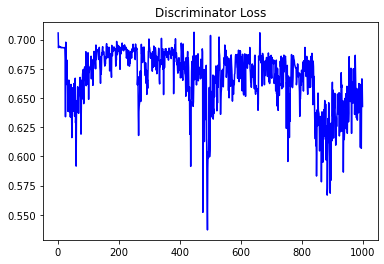

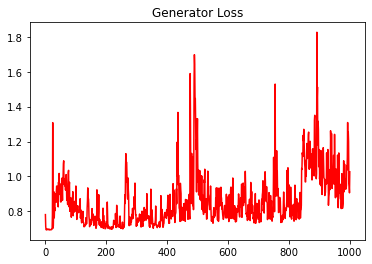

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.04895822972639815


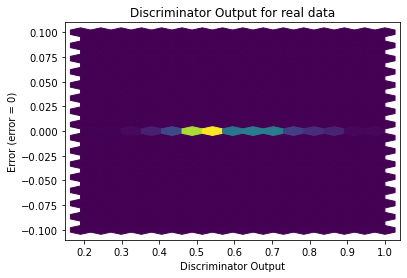

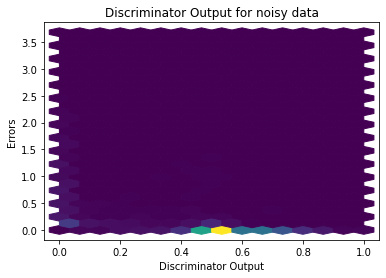

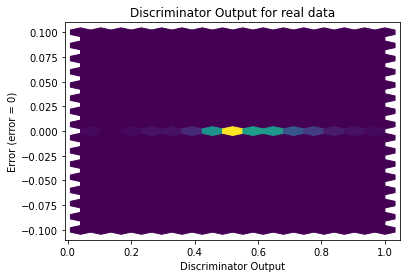

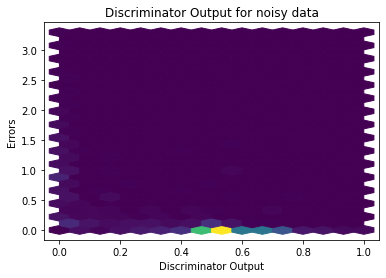

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

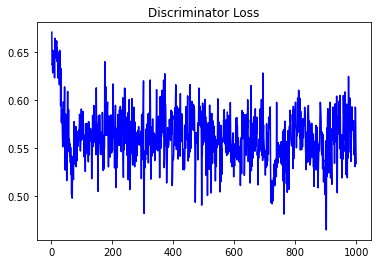

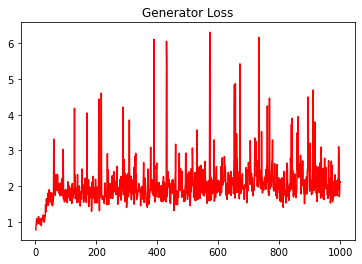

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.05115274915430852


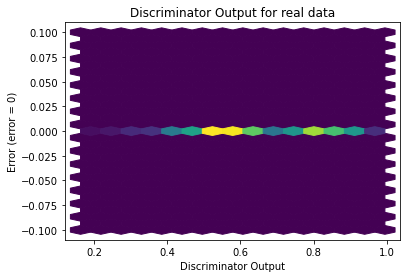

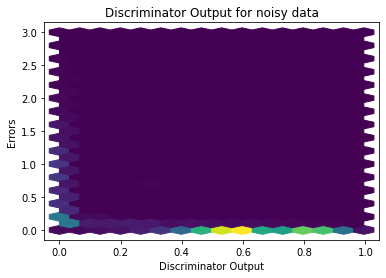

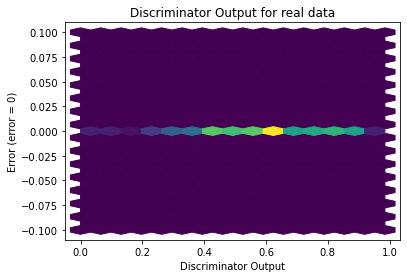

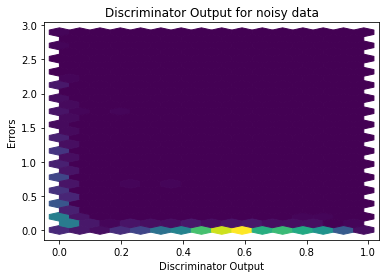

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


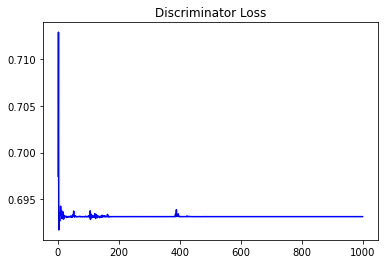

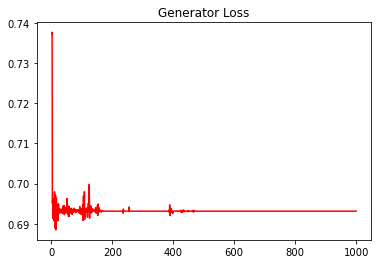

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.1028476085857331


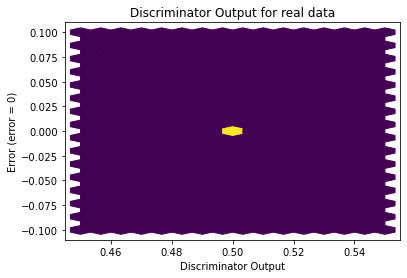

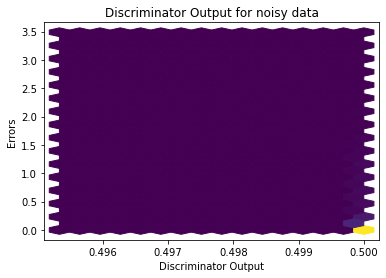

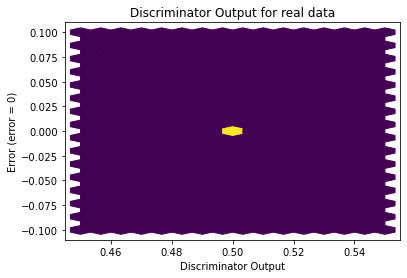

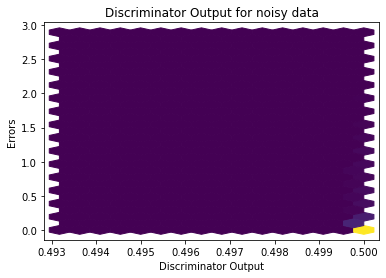

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


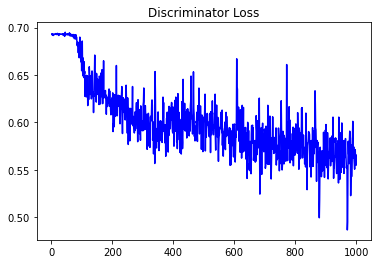

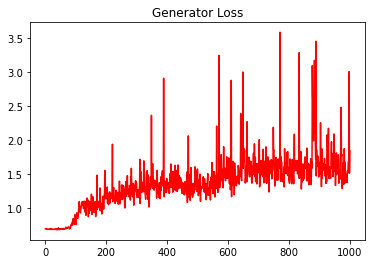

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.09451201223417537


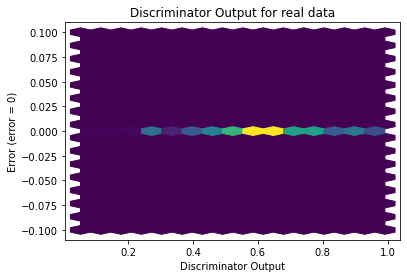

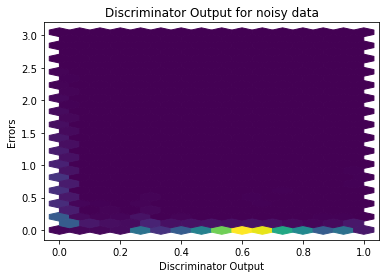

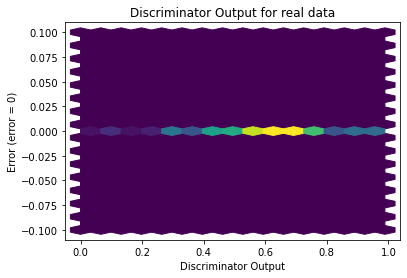

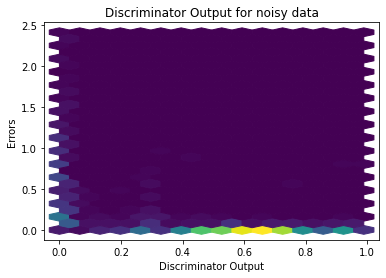

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0894]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4901]], requires_grad=True)
